# BEBI5009 Homework 1

Student: Shao-Ting Chiu

Student ID: B03901045

Source Code on Github: https://github.com/stevengogogo/BEBI-5009-Mathematical-Biology

Reference: B. P.Ingalls, Mathematical Modelling in Systems Biology : An Introduction, vol. 53, no. 9. 2014.

## Problem 1. Network Modelling

![Image of problem-2-4-7](img/p2-4-7.png)

### a.i) Construct a differential equation model for the network.

Sol: 

According the assumption in a)

$$\begin{align}
\frac{d[A]}{dt}&=-v_{1}=-k_{1}[A][B] \\
\frac{d[B]}{dt}&=-v_{1}+v_{2}=-k_{1}[A][B]+k_{2}[D] \\
\frac{d[C]}{dt}&=v_{1}-v_{3}=k_{1}[A][B]-k_{3}[C] \\
\frac{d[D]}{dt}&=v_{1}-v_{2}=k_{1}[A][B]-k_{2}[D] \\
\frac{d[E]}{dt}&=\frac{d[F]}{dt}=v_{3}=k_{3}[C] 
\end{align}$$

Therefore, $-\frac{d[B]}{dt}=\frac{d[D]}{dt}$; $-\frac{d[C]}{dt}-\frac{d[A]}{dt}=\frac{d[E]}{dt}=\frac{d[F]}{dt}$

We can observe that $\frac{d[D]}{dt}$, $\frac{d[E]}{dt}$, $\frac{d[F]}{dt}$ are the linear combination of set: [$\frac{d[A]}{dt},\frac{d[B]}{dt}, \frac{d[C]}{dt}$]. Because $-\frac{d[B]}{dt}=\frac{d[D]}{dt}$, $[D] = -[B]+c_{0}$, where $c_{0}$ is a constant. This network includes three equations and algebraic equations, and they are

$$\frac{d[A]}{dt}=-v_{1}=-k_{1}[A][B]$$

$$\frac{d[B]}{dt}=v_{1}-v_{2}=k_{1}[A][B]-k_{2}[D]=k_{1}[A][B]-k_{2}(-[B]+c_{0})$$

$$\frac{d[C]}{dt}=v_{1}-v_{3}=k_{1}[A][B]-k_{3}[C]$$

### a.ii) Solve the steady state concentration by rate variables and initial concentrations.

Sol:

Under the steady state, all the chemicals will reach the dynamic equibrilium. In other words, the derivative of chemicals in respect of time is zero. Besides, I assume all the rate variables aren't equal to zero.

$$\begin{align}
-k_{1}[A]^{ss}[B]^{ss}=0 \\
k_{1}[A]^{ss}[B]^{ss}-k_{2}(-[B]^{ss}+c_{0})=0 \\
k_{1}[A]^{ss}[B]^{ss}-k_{3}[C]^{ss}=0 \\
\end{align}$$

According to the equations above,
$$k_{1}[A]^{ss}[B]^{ss}=0$$

$$k_{3}[C]^{ss}=k_{1}[A]^{ss}[B]^{ss}=0$$

$$k_{2}[B]^{ss}-k_{2}c_{0}=0$$

where $c_{0}=[B]_{0}+[D]_{0}$

The steady state concentraions are:
$$\begin{align}
[A]^{ss}&=0 \\
[B]^{ss}&=[B]_{t=0}+[D]_{t=0} \\
[C]^{ss}&=0 \\
[D]^{ss}&=\frac{k_1}{k_2}[A]^{ss}[B]^{ss}=0 \\
[E]^{ss}&=\int_{0}^{\infty}[C]_{t}dt+[E]_{t=0} \\
[F]^{ss}&=\int_{0}^{\infty}[C]_{t}dt+[F]_{t=0} \\
\end{align}$$

### a.iii) Verify the Result by Simulation

Here, I used Scipy ODE solver, odeint which I learned from [Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), and [Scipy Cookbook](http://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html)

The following code defines the system of equations (also known as vector field). Note that the time t must be the second argument of the function.

In [63]:
def reaction(agent, t, k):
    """
    Define the differential equations for the network system.
    
    Arguments:
            agent: vector of the chemical concentrations:
                    agent = [a,b,c,d,e,f]
                k: vector of rate constants:
                    k = [k1, k2, k3]
                t: time
    """
    a, b, c, d, e, f = agent
    k1, k2, k3 = k
    
    # Create dfdt = [a', b', c', d', e', f']:
    dfdt = [
            -1*k1*a*b,
            -1*k1*a*b+k2*d,
            k1*a*b-k3*c,
            k1*a*b-k2*d,
            k3*c,
            k3*c
           ]
    
    return dfdt

Next, here is a script that uses odeint to solve the equations for a given set of parameter values, initial conditions, and time interval.

In [92]:
# Use ODEINT to solve the differential equations defines by the vector field
import numpy as np
from scipy.integrate import odeint

# Initial condition and rate constants
a0, b0, c0, d0, e0, f0 = 1.0, 1.0, 0.5, 0.0, 0.0, 0.0 # Initial condition
k1, k2, k3 = 3.0, 1.0, 4.0 # Rate constants

# Pack up the parameters and initial conditions:
agent0 = [a0, b0, c0, d0, e0, f0]
k = [k1, k2, k3]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 500

# Create the time samples for the output of the ODE solver.
t = np.linspace(0, stoptime, numpoints)

# Call the ODE solver 
wsol = odeint(reaction, agent0, t, args=(k,), atol=abserr, rtol=relerr)

In [96]:
# Check the shape of wsol (numpoints, chemicals)
wsol.shape

(500, 6)

Print out the steady-state concentrations of network systmem

In [94]:
label = [r'[A]',r'[B]',r'[C]',r'[D]',r'[E]',r'[F]']

# Print out Steady-state concentrations
print('Steady-state concentration')
for i in range(wsol.shape[1]):
    print(label[i],': ',round(wsol[-1,i], 2),'\tmM')
    

Steady-state concentration
[A] :  0.0 	mM
[B] :  1.0 	mM
[C] :  0.0 	mM
[D] :  0.0 	mM
[E] :  1.5 	mM
[F] :  1.5 	mM


The following script uses Matplotlib to plot the solution generated by the above script.

Text(0,0.5,'Concentration(mM)')

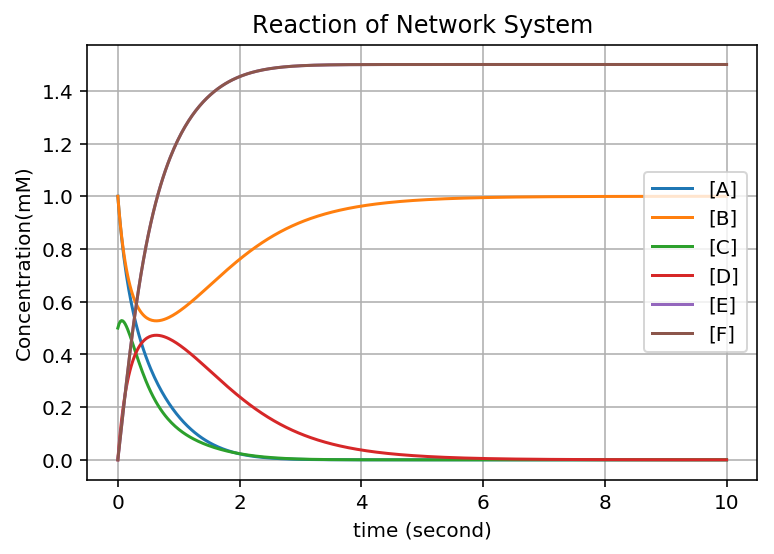

In [95]:
import matplotlib.pyplot as plt

fig_reaction = plt.figure()

for i in range(wsol.shape[1]):
    plt.plot(t,wsol[:,i], label=label[i])

plt.legend()
plt.grid()
plt.title('Reaction of Network System')
plt.xlabel('time (second)')
plt.ylabel('Concentration(mM)')

According to the results, $[A]^{ss}=[C]^{ss}=[D]^{ss}=0$, $[B]^{ss}=[B]_0+[D]_0=1+0$, $[E]^{ss}=[F]^{ss}=1.5mM$ which mutually support the calculation in a.ii). Besides, the solver even told us the value of  $[E]^{ss}$ and $[F]^{ss}$.
In conclusion, the simulation support the paper-and-pancil calculation of a.i), and a.ii). 

## Problem 2. Numerical methid: Fourth-order Runge Kutta Method (RK4)

SAMPLE CODE: https://github.com/SosirisTseng/BEBI-5009/tree/master/ch2

![Image of problem-2-1-RK4](img/p2-1-RK4.png)

![Image of problem-2-2-RK4](img/p2-2-RK4.png)

Sol:

### 2.1 Analytical Solution

$\frac{da(t)}{dt}=-a(t)$ is an autonomous equation. It can be solved by "integral-by-part" method:

$$\begin{align}
    \frac{da(t)}{dt} &= -a(a) \\
    \frac{-1}{a(t)}da(t) &= dt \\
    \int\frac{-1}{a(t)}da(t) &= \int dt \\
    -ln(a(t)) &= t + c_{0} \\
    a(t) &= c_{1}e^{-t} \\
\end{align}$$

where $c_{0}$ and $c_{1}$ are constants.

With initial condition $a(0)=1$:

$$\begin{align}
    a(t)=e^{-t}
\end{align}$$

### 2.2 Numerical Solution

In the following code, both RK and Euler method are implemented and wrapped inside an object-class. In the beginning, I define the automous ODE in a Python function. 

In [3]:
def autoODE(a, t):
    """
    Define the differential equations.
    
    Arguments:
            a: variable
            t: time
    """
    # Create dfdt = [a']:
    dfdt = [
            -a
           ]
    
    return dfdt

Second, I created an Python class including RK and Euler ODE solver, which provides flexibility for future add-ons.

In [62]:
class ode_equation:
    """
    Class object provide RK estimation for ODE equation
    
    Functions:
        __init__
        iteration
        rk_step
        k
        euler_step
    """
    def __init__(self, equation):
        """
        f(a) = da/dt
        """
        self.equation = equation # Store the ODE function
        
    def iteration(self, init=1, start=0, end=4, h=1/3.0, method='rk'):
        """
        Using iteration process to simulate the ODE equation
        
        Arguments:
                init: initial value, a(0)
                start: start time
                end: end time
                h: step size
        """
        
        # Set time step and to store iteration process
        # h_r is the real step. Approximately equal to h
        self.t, h_r = np.linspace(start, end, int((end-start)/h), retstep=True)
        self.a = [] 
        
        # Set initial value
        self.a.append(init)
        
        # Iteration process 
        for i, time in enumerate(self.t[1:]):
            
            if method == 'rk':
                a_next = self.a[i] + self.rk_step(self.a[i], time, h_r)
                
            elif method == 'euler':
                a_next = self.a[i] + self.euler_step(self.a[i], time, h_r)
                
            else:
                raise ValueError('This class only provides rk and euler Method')
                
            self.a.append(a_next) # Add current step
            
        return self.a, self.t, h_r
            
        
        
    def rk_step(self, a, t, h):
        """
        Return one step difference by Rung-Kutta Method.
        
        Arguments:
                a: a(t) value
                t: current time
                h: step size
        """
        k0, k1, k2, k3 = self.k(a, t, h)
        return (1/6.0)*( k0 + 2*k1 + 2*k2 + k3 )
    
    def k(self, a, t, h):
        """
        Calculate k of 3 order 
        
        Arguments:
                a: value at a(t)
                t: time
                h: step size
        """
        
        k0 = h*self.equation(a, t)[0]
        k1 = h*self.equation(a + k0/2.0, t + h/2.0)[0]
        k2 = h*self.equation(a + k1/2.0, t + h/2.0)[0]
        k3 = h*self.equation(a + k2, t + h)[0]
        
        return [k0, k1, k2, k3]
    
    def euler_step(self, a, t, h):
        """
        Return one step difference by Euler Method.
        
        Arguments:
                a: a(t) value
                t: current time
                h: step size
        """
        return h*self.equation(a,t)[0]

Then, create a ode solver which has defined above, and input parameters given in the question.

In [70]:
import numpy as np

# Set the ODE equation
ode = ode_equation(autoODE)

# Analytical Solution
t_ana = np.linspace(0, 4, int((4-0)/(1/3.0)))
a_ana = np.exp(-t_ana)

# Approximate by RK 
a1, t1, h1 = ode.iteration(init=1, start=0, end=4, h=1/3.0, method='rk')
a2, t2, h2 = ode.iteration(init=1, start=0, end=4, h=2/3.0, method='rk')

# Approximate by Euler
a1e, t1e, h1e = ode.iteration(init=1, start=0, end=4, h=1/3.0, method='euler')
a2e, t2e, h2e = ode.iteration(init=1, start=0, end=4, h=2/3.0, method='euler')

The following script uses [Matplotlib](https://matplotlib.org/tutorials/index.html) to plot the results generated by the above ode solver. Besides, I used $\TeX$ inside the plot. ([tutorial](https://matplotlib.org/users/usetex.html))

Besides, analytical solution was also plotted together as comparison.

Text(0,0.5,'a(t)')

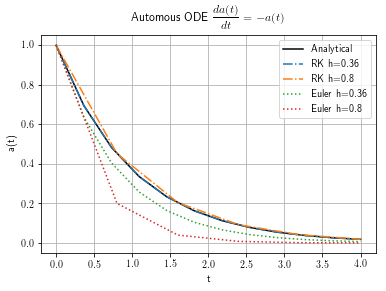

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

# To use latex format
from matplotlib import rc
rc('text', usetex=True)

# Create a figure
fig_rk = plt.figure()

# Plot Analytical solution
plt.plot(t_ana, a_ana, label='Analytical', linestyle='-', color='black')

# Plot RK approximation
plt.plot(t1, a1, label='RK h='+str(round(h1,2)), linestyle='-.')
plt.plot(t2, a2, label='RK h='+str(round(h2,2)), linestyle='-.')

# Plot Euler approximation
plt.plot(t1e, a1e, label='Euler h='+str(round(h1e,2)), linestyle=':')
plt.plot(t2e, a2e, label='Euler h='+str(round(h2e,2)), linestyle=':')

plt.legend()
plt.grid()
plt.title('Automous ODE 'r'$\displaystyle\frac{da(t)}{dt}=-a(t)$')
plt.xlabel('t')
plt.ylabel('a(t)')

### 2.3 Conclusion

1. According to the results, the RK approximation overestimates the analytical solution

2. RK approximation provides better accuracy compared to the Euler method with same step size. 

3. Unlike RK method, Euler approximation underestimates the analytical solution.